In [ ]:
## Importing Lib

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
## Data Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
## Building model

In [7]:
cnn = tf.keras.models.Sequential()

In [ ]:
## Convolution layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [23]:
cnn.add(tf.keras.layers.Flatten())

In [25]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [27]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [29]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
## Compile and train

In [33]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1138s 515ms/step - accuracy: 0.4017 - loss: 2.1386 - val_accuracy: 0.8136 - val_loss: 0.5779
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1185s 540ms/step - accuracy: 0.8385 - loss: 0.5092 - val_accuracy: 0.9009 - val_loss: 0.3046
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1158s 527ms/step - accuracy: 0.9052 - loss: 0.2908 - val_accuracy: 0.9278 - val_loss: 0.2250
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1155s 526ms/step - accuracy: 0.9349 - loss: 0.1996 - val_accuracy: 0.9432 - val_loss: 0.1730
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1160s 528ms/step - accuracy: 0.9517 - loss: 0.1479 - val_accuracy: 0.9256 - val_loss: 0.2331
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1146s 521ms/step - accuracy: 0.9611 - loss: 0.1183 - val_accuracy: 0.9304 - val_loss: 0.2294
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1171s 533ms/step - accuracy: 0.9675 - loss: 0.1001 - val_accuracy: 0.9525 - val_loss: 0.1513
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1157s 527ms/s

In [ ]:
## Evaluating Model

In [40]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 360s 164ms/step - accuracy: 0.9874 - loss: 0.0388
Training accuracy: 0.9883206486701965


In [42]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 89s 161ms/step - accuracy: 0.9619 - loss: 0.1294
Validation accuracy: 0.9625540375709534


In [ ]:
##saving model

In [44]:
cnn.save('trained_plant_disease_model.keras')

In [46]:
training_history.history

{'accuracy': [0.608506977558136,
  0.8620385527610779,
  0.91481614112854,
  0.9399245977401733,
  0.9555302858352661,
  0.9645209312438965,
  0.9710221290588379,
  0.9756170511245728,
  0.9796713590621948,
  0.9818336963653564],
 'loss': [1.340761661529541,
  0.4318414032459259,
  0.2613348066806793,
  0.18213000893592834,
  0.1357337385416031,
  0.10699383914470673,
  0.08975422382354736,
  0.07355993241071701,
  0.06357066333293915,
  0.05586996302008629],
 'val_accuracy': [0.8136239647865295,
  0.9008650183677673,
  0.9278397560119629,
  0.9432051181793213,
  0.925563395023346,
  0.9304006099700928,
  0.952481210231781,
  0.9560664892196655,
  0.949066698551178,
  0.9625540375709534],
 'val_loss': [0.5778588652610779,
  0.30459341406822205,
  0.2250363975763321,
  0.1729564070701599,
  0.23313990235328674,
  0.22935546934604645,
  0.15129615366458893,
  0.15000469982624054,
  0.17680661380290985,
  0.12720660865306854]}

In [ ]:
##Accuracy Visualization

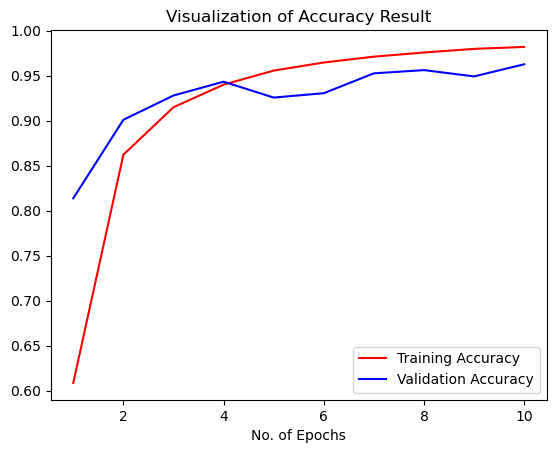

In [48]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()